In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal

In [11]:
file_path = '/home/mehul/Documents/training/python/data/airline-passengers.csv'

In [12]:
df = pd.read_csv(file_path, parse_dates=['Month'], index_col=0)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Figure size 1152x360 with 0 Axes>

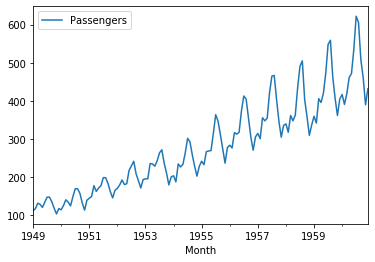

In [16]:
plt.figure(figsize=(16, 5))
df.plot()
plt.show()

# Detrending
# subtract the trend from the series

In [19]:
result = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq')

In [20]:
result.trend

Month
1949-01-01    118.588481
1949-02-01    119.734169
1949-03-01    120.879856
1949-04-01    122.025544
1949-05-01    123.171232
                 ...    
1960-08-01    486.355575
1960-09-01    490.716443
1960-10-01    495.077312
1960-11-01    499.438180
1960-12-01    503.799048
Name: trend, Length: 144, dtype: float64

In [24]:
detrended_data_1 = df.Passengers - result.trend

In [26]:
detrended_data_1

Month
1949-01-01     -6.588481
1949-02-01     -1.734169
1949-03-01     11.120144
1949-04-01      6.974456
1949-05-01     -2.171232
                 ...    
1960-08-01    119.644425
1960-09-01     17.283557
1960-10-01    -34.077312
1960-11-01   -109.438180
1960-12-01    -71.799048
Length: 144, dtype: float64

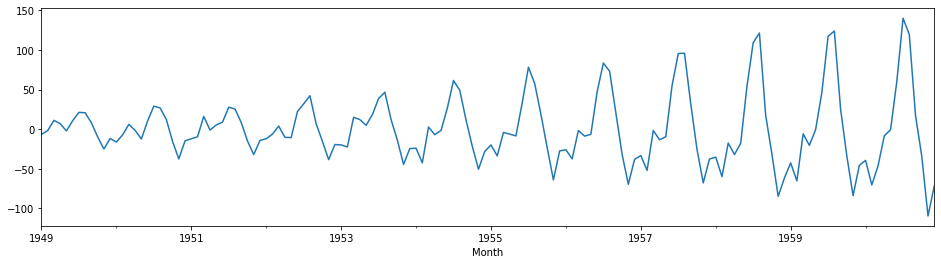

In [27]:
plt.figure(figsize=(16, 4))
detrended_data_1.plot()
plt.show()

# Detrending
# Subtracting line of best fit

In [33]:
df2 = df.reset_index()

In [34]:
df2

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [38]:
detrended_data_2 = signal.detrend(df2.Passengers)

In [39]:
detrended_data_2

array([ 21.69003831,  25.03285441,  36.3756705 ,  30.71848659,
        20.06130268,  31.40411877,  41.74693487,  39.08975096,
        24.43256705,   4.77538314, -12.88180077,  -1.53898467,
        -7.19616858,   1.14664751,  13.4894636 ,   4.83227969,
        -7.82490421,  13.51791188,  31.86072797,  29.20354406,
        14.54636015, -13.11082375, -34.76800766, -11.42519157,
        -9.08237548,  -6.73955939,  18.6032567 ,   0.9460728 ,
         7.28888889,  10.63170498,  28.97452107,  26.31733716,
         8.66015326, -15.99703065, -34.65421456, -17.31139847,
       -14.96858238,  -8.62576628,   1.71704981, -12.9401341 ,
       -13.59731801,  18.74549808,  28.08831418,  37.43113027,
         1.77394636, -18.88323755, -40.54042146, -21.19760536,
       -21.85478927, -24.51197318,  12.83084291,   9.173659  ,
         0.5164751 ,  11.85929119,  30.20210728,  35.54492337,
        -2.11226054, -30.76944444, -64.42662835, -46.08381226,
       -45.74099617, -64.39818008, -20.05536398, -30.71

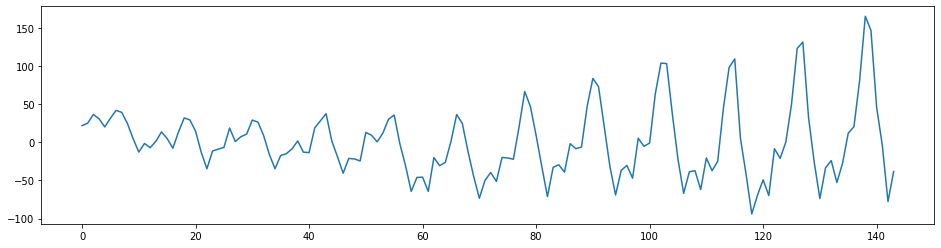

In [41]:
plt.figure(figsize=(16, 4))
plt.plot(detrended_data_2)
plt.show()

# Deseasonalization from a time series

In [46]:
seasonal_comp = result.seasonal
seasonal_comp

Month
1949-01-01    0.911256
1949-02-01    0.890342
1949-03-01    1.012397
1949-04-01    0.980719
1949-05-01    0.979495
                ...   
1960-08-01    1.219640
1960-09-01    1.056262
1960-10-01    0.920694
1960-11-01    0.797882
1960-12-01    0.893580
Name: seasonal, Length: 144, dtype: float64

In [48]:
deaseasonalized_data = df.Passengers / seasonal_comp
deaseasonalized_data

Month
1949-01-01    122.907218
1949-02-01    132.533269
1949-03-01    130.383583
1949-04-01    131.536173
1949-05-01    123.533108
                 ...    
1960-08-01    496.867889
1960-09-01    480.941290
1960-10-01    500.709107
1960-11-01    488.794247
1960-12-01    483.448698
Length: 144, dtype: float64

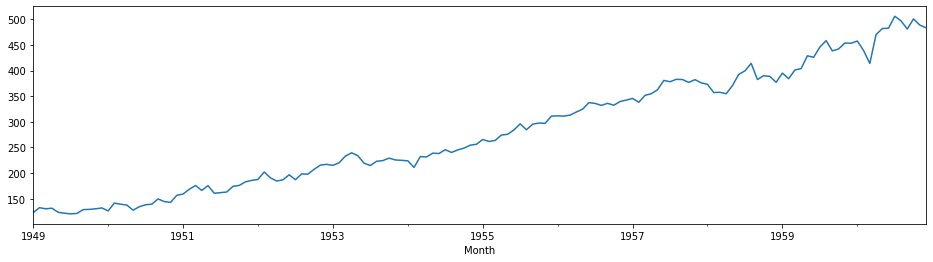

In [49]:
plt.figure(figsize=(16, 4))
deaseasonalized_data.plot()
plt.show()

# White noise

In [50]:
import numpy as np

In [52]:
randvals = np.random.randn(1000)
print(randvals.mean())
print(randvals.std())

0.02724718349278369
1.011054642933797


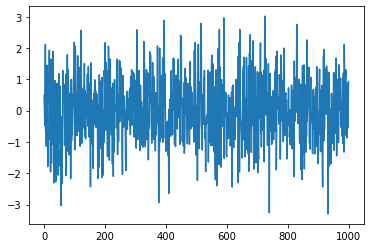

In [53]:
pd.Series(randvals).plot()